# UTRpy output analysis

In [ ]:
from pandas import read_csv
from numpy  import min, max, mean, std

gff  = "utrpy.gff" # Put the path to your UTRpy-GFF-file here
gff  = read_csv(gff, sep="\t", header=None)
utr5 = gff.loc[gff[2]=="5'-UTR"].reset_index(drop=True)
utr3 = gff.loc[gff[2]=="3'-UTR"].reset_index(drop=True)

display(utr5)
display(utr3)

,0,1,2,3,4,5,6,7,8
0,HiC_scaffold_1,UTRpy,5'-UTR,3437343,3437352,.,-,.,ID=3pUTR_HiC_scaffold_1_263;Parent=br_SR_prot1...
1,HiC_scaffold_1,UTRpy,5'-UTR,3474685,3474886,.,+,.,ID=3pUTR_HiC_scaffold_1_386;Parent=ga_GWS_g38.t1
2,HiC_scaffold_1,UTRpy,5'-UTR,3691610,3691776,.,+,.,ID=3pUTR_HiC_scaffold_1_467;Parent=ga_chond_ex...
3,HiC_scaffold_1,UTRpy,5'-UTR,3903124,3904391,.,+,.,ID=3pUTR_HiC_scaffold_1_512;Parent=ga_chond_ex...
4,HiC_scaffold_1,UTRpy,5'-UTR,4470916,4471012,.,-,.,ID=3pUTR_HiC_scaffold_1_745;Parent=ga_GWS_g50.t1
...,...,...,...,...,...,...,...,...,...
8602,HiC_scaffold_1984,UTRpy,5'-UTR,207936,207991,.,+,.,ID=3pUTR_HiC_scaffold_1984_1;Parent=ga_GWS_g98...
8603,HiC_scaffold_1986,UTRpy,5'-UTR,71140,72645,.,+,.,ID=3pUTR_HiC_scaffold_1986_1;Parent=br_LR_prot...
8604,HiC_scaffold_2053,UTRpy,5'-UTR,258434,258778,.,+,.,ID=3pUTR_HiC_scaffold_2053_1;Parent=ga_GWS_g98...
8605,HiC_scaffold_2061,UTRpy,5'-UTR,82091,82122,.,+,.,ID=3pUTR_HiC_scaffold_2061_1;Parent=ga_GWS_g98...


,0,1,2,3,4,5,6,7,8
0,HiC_scaffold_1,UTRpy,3'-UTR,918473,918690,.,+,.,ID=3pUTR_HiC_scaffold_1_43;Parent=ga_GWS_g19.t1
1,HiC_scaffold_1,UTRpy,3'-UTR,2206428,2207398,.,-,.,ID=3pUTR_HiC_scaffold_1_54;Parent=ga_chond_ext...
2,HiC_scaffold_1,UTRpy,3'-UTR,2590726,2592440,.,+,.,ID=3pUTR_HiC_scaffold_1_108;Parent=ga_GWS_g25.t1
3,HiC_scaffold_1,UTRpy,3'-UTR,2827119,2828086,.,-,.,ID=3pUTR_HiC_scaffold_1_135;Parent=br_SR_prot1...
4,HiC_scaffold_1,UTRpy,3'-UTR,3510590,3510823,.,+,.,ID=3pUTR_HiC_scaffold_1_386;Parent=ga_GWS_g38.t1
...,...,...,...,...,...,...,...,...,...
11149,HiC_scaffold_2056,UTRpy,3'-UTR,25102,29687,.,-,.,ID=3pUTR_HiC_scaffold_2056_1;Parent=ga_GWS_g98...
11150,HiC_scaffold_2058,UTRpy,3'-UTR,44746,54756,.,-,.,ID=3pUTR_HiC_scaffold_2058_1;Parent=ga_GWS_g98...
11151,HiC_scaffold_2061,UTRpy,3'-UTR,163637,168904,.,+,.,ID=3pUTR_HiC_scaffold_2061_1;Parent=ga_GWS_g98...
11152,HiC_scaffold_2077,UTRpy,3'-UTR,342632,342648,.,+,.,ID=3pUTR_HiC_scaffold_2077_1;Parent=ga_GWS_g98...


In [ ]:
utr3_lens = utr3[4]-utr3[3]
utr5_lens = utr5[4]-utr5[3]

print("     3'UTRs  5'UTRs")
print("Min:  {0:>5}   {1:>5}".format(len(utr3_lens), len(utr5_lens)))
print("Min:  {0:>5}   {1:>5}".format(min(utr3_lens), min(utr5_lens)))
print("Mean: {0:>5}   {1:>5}".format(round(mean(utr3_lens)), round(mean(utr5_lens))))
print("Max:  {0:>5}   {1:>5}".format(max(utr3_lens), max(utr5_lens)))
print("Std:  {0:>5}   {1:>5}".format(round(std(utr3_lens)), round(std(utr5_lens))))

     3'UTRs  5'UTRs
Min:  11154    8607
Min:      1       1
Mean:  2450     425
Max:  19760   19552
Std:   2805    1261


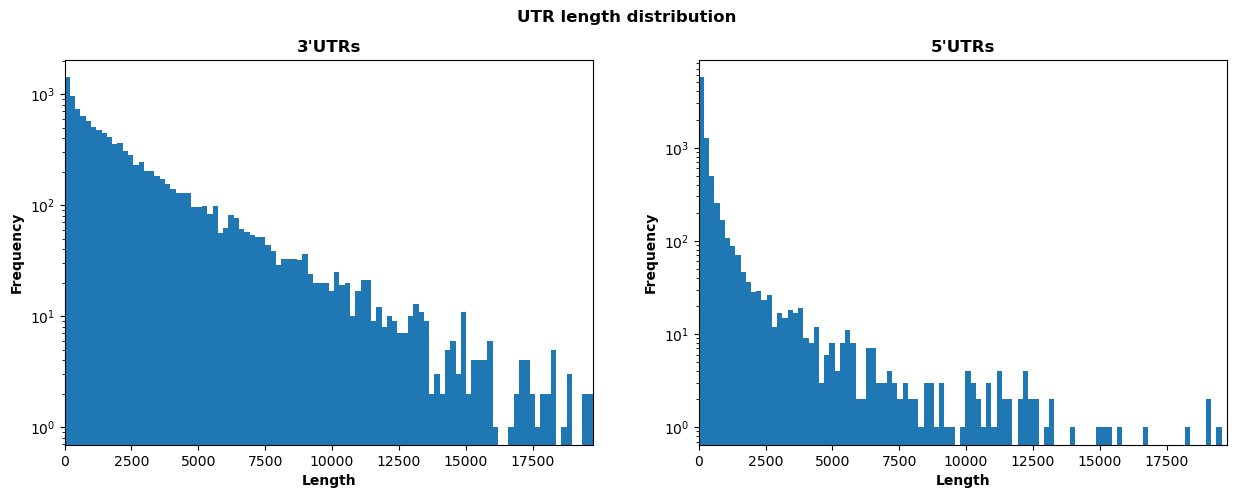

In [91]:
from matplotlib import pyplot

fig, axes = pyplot.subplots(1,2, figsize=(15,5))

fig.suptitle("UTR length distribution", fontweight="bold")
for ax in axes:
    ax.set_xlabel("Length", fontweight="bold")
    ax.set_ylabel("Frequency", fontweight="bold")
    ax.set_xlim(xmax=max([max(utr3_lens), max(utr3_lens)]))
    ax.set_yscale("log")
axes[0].set_title("3'UTRs", fontweight="bold")
axes[1].set_title("5'UTRs", fontweight="bold")
axes[0].hist(utr3_lens, bins=100)
axes[1].hist(utr5_lens, bins=100)

pyplot.show()